<a href="https://colab.research.google.com/github/FelipeVitta/DecisionTreeClassifier---CarData/blob/main/Car_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       116
           1       0.88      0.85      0.86        84

    accuracy                           0.89       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.89      0.88       200

True negative rate: 0.9137931034482759
False positive rate: 0.08620689655172414
False negative rate: 0.15476190476190477
True positive rate: 0.8452380952380952


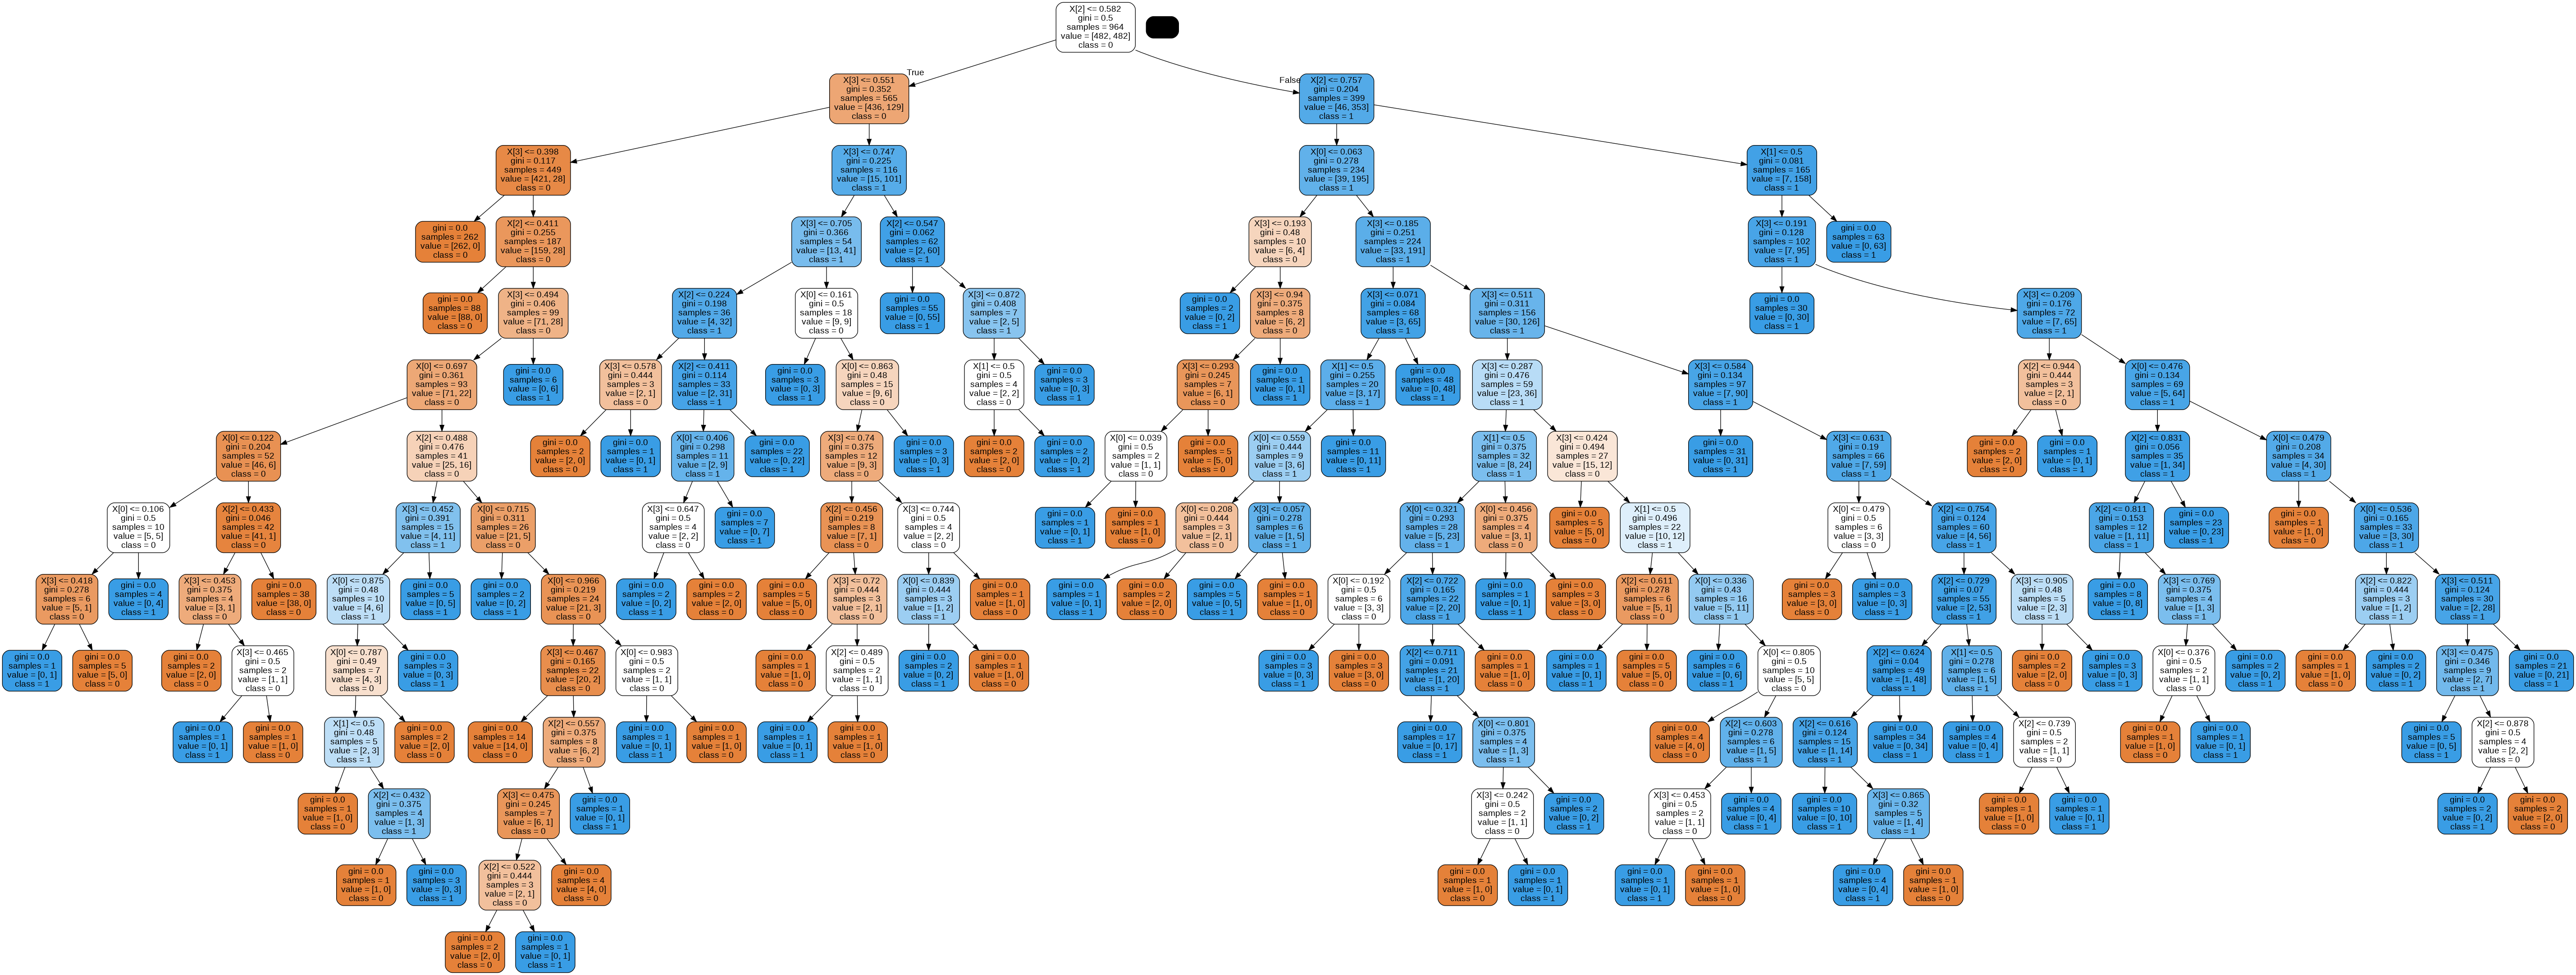

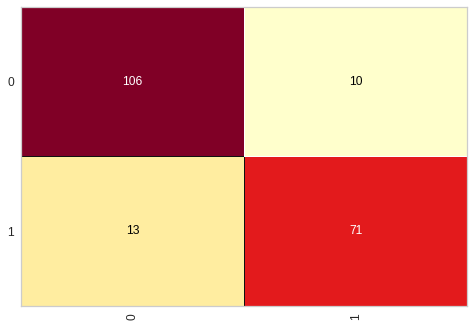

In [2]:
!pip install plotly --upgrade
!pip install kneed # To install only knee-detection algori

from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from imblearn.over_sampling import SMOTE 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from kneed import DataGenerator, KneeLocator #para mostrar o número de grupos ideal do agrupamento
from sklearn.cluster import KMeans #Importando a função Kmeans
from sklearn.preprocessing import StandardScaler #Função utilizada para normalização dos dados
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler #Função utilizada para normalização dos dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

dataset = pd.read_csv("/content/sample_data/car_data.csv")

ordinal_encoder = OrdinalEncoder() #binariza atributos ordinais

#separando imputs e target 
inputs = dataset.drop('Purchased',axis='columns')
target = dataset['Purchased'].astype('str')

#binarizando o atributo
inputs[['Gender']] = ordinal_encoder.fit_transform(inputs[['Gender']])

#imputando dados ausentes
knn_imputer = KNNImputer(n_neighbors=8)
inputs = knn_imputer.fit_transform(inputs)

#separando conjuntos de treino e teste
x_treino,x_teste,y_treino,y_teste = train_test_split(inputs, target, test_size = 0.20, random_state = 3)

#normalização
scaler = MinMaxScaler()
x_treino = scaler.fit_transform(x_treino)
x_teste = scaler.transform(x_teste)

#balanceamento de dados oversample
smt = SMOTE(random_state=1)
x_res, y_res = smt.fit_resample(x_treino,y_treino)

model = DecisionTreeClassifier(criterion="gini",random_state=60)
model.fit(x_res, y_res) #treina o modelo

previsao = model.predict(x_teste)

#gerando a matriz de confusão
confusion_matrix(y_teste, previsao)

cm = ConfusionMatrix(model)
cm.fit(x_treino, y_treino)
cm.score(x_teste,y_teste)

#gerando as metricas

print(classification_report(y_teste, previsao))


tn, fp, fn, tp = confusion_matrix(y_teste, model.predict(x_teste)).ravel()
tnr = tn / (tn + fp) # true negative rate 
fpr = fp / (tn + fp) # false positive rate 
fnr = fn / (fn + tp) # false negative rate 
tpr = tp / (tp + fn) # true positive rate
print('True negative rate: ' + str(tnr))
print('False positive rate: ' + str(fpr))
print('False negative rate: ' + str(fnr))
print('True positive rate: ' + str(tpr))

#imprimindo a arvore

dot_data = tree.export_graphviz(model, out_file=None,
class_names = model.classes_, rounded = True, filled = True) #exportando para DOT

graph = pydotplus.graph_from_dot_data(dot_data) #provides a Python Interface to Graphviz's Dot language.
Image(graph.create_png()) #criando a imagem



